# Feature importance through regression model

In [155]:
import pandas as pd
import numpy as np
data=pd.read_csv("dataset\merged_data_onehot.csv")

In [173]:
df=data.drop(["Unnamed: 0","year_month","DIST_NUM"],axis=1)
#delete dummy information
df = df.loc[:, (df != 0).any(axis=0)] 
#we set our response variable as the index instead of the number of car crashed
df=df.drop("car_crash",axis=1)

In [174]:
df.columns

Index(['crime_total', 'ILLUMINATION_1.0', 'ILLUMINATION_2.0',
       'ILLUMINATION_3.0', 'ILLUMINATION_4.0', 'ILLUMINATION_5.0',
       'ILLUMINATION_6.0', 'ILLUMINATION_8.0', 'ILLUMINATION_9.0',
       'INTERSECT_TYPE_0', 'INTERSECT_TYPE_1', 'INTERSECT_TYPE_10',
       'INTERSECT_TYPE_11', 'INTERSECT_TYPE_12', 'INTERSECT_TYPE_2',
       'INTERSECT_TYPE_3', 'INTERSECT_TYPE_5', 'INTERSECT_TYPE_6',
       'INTERSECT_TYPE_7', 'INTERSECT_TYPE_9', 'LOCATION_TYPE_0',
       'LOCATION_TYPE_1', 'LOCATION_TYPE_2', 'LOCATION_TYPE_3',
       'LOCATION_TYPE_4', 'LOCATION_TYPE_5', 'LOCATION_TYPE_6',
       'LOCATION_TYPE_7', 'LOCATION_TYPE_8', 'LOCATION_TYPE_99',
       'ROAD_CONDITION_0', 'ROAD_CONDITION_1', 'ROAD_CONDITION_2',
       'ROAD_CONDITION_3', 'ROAD_CONDITION_4', 'ROAD_CONDITION_5',
       'ROAD_CONDITION_6', 'ROAD_CONDITION_7', 'ROAD_CONDITION_8',
       'ROAD_CONDITION_9', 'ROAD_CONDITION_98', 'ROAD_CONDITION_99',
       'WEATHER1_10', 'WEATHER1_2', 'WEATHER1_3', 'WEATHER1_4', 'WEATHE

In [187]:
#delete those unknown classification cases
df=df.drop(['ILLUMINATION_9.0','LOCATION_TYPE_99','ROAD_CONDITION_98','ROAD_CONDITION_99','WEATHER1_98','WEATHER1_99'],axis=1)

## Observe the correlation coefficient associated to the index

In [188]:
import pandas as pd
corr=df.corr(method='pearson')
corr["index"].sort_values(ascending=False).head(10)

index               1.000000
ROAD_CONDITION_1    0.305257
WEATHER1_3          0.256786
LOCATION_TYPE_0     0.234383
INTERSECT_TYPE_1    0.140156
ILLUMINATION_1.0    0.096190
INTERSECT_TYPE_0    0.064103
crime_total         0.063013
ILLUMINATION_3.0    0.022870
WEATHER1_2         -0.001173
Name: index, dtype: float64

In [189]:
corr["index"].sort_values(ascending=True).head(10)

ROAD_CONDITION_9   -0.227395
WEATHER1_7         -0.152120
LOCATION_TYPE_2    -0.147179
WEATHER1_10        -0.121555
LOCATION_TYPE_7    -0.105887
INTERSECT_TYPE_2   -0.101209
ROAD_CONDITION_2   -0.095943
INTERSECT_TYPE_3   -0.095582
ILLUMINATION_4.0   -0.093384
ILLUMINATION_2.0   -0.086349
Name: index, dtype: float64

In [190]:
df.columns

Index(['crime_total', 'ILLUMINATION_1.0', 'ILLUMINATION_2.0',
       'ILLUMINATION_3.0', 'ILLUMINATION_4.0', 'ILLUMINATION_5.0',
       'ILLUMINATION_6.0', 'ILLUMINATION_8.0', 'INTERSECT_TYPE_0',
       'INTERSECT_TYPE_1', 'INTERSECT_TYPE_10', 'INTERSECT_TYPE_11',
       'INTERSECT_TYPE_12', 'INTERSECT_TYPE_2', 'INTERSECT_TYPE_3',
       'INTERSECT_TYPE_5', 'INTERSECT_TYPE_6', 'INTERSECT_TYPE_7',
       'INTERSECT_TYPE_9', 'LOCATION_TYPE_0', 'LOCATION_TYPE_1',
       'LOCATION_TYPE_2', 'LOCATION_TYPE_3', 'LOCATION_TYPE_4',
       'LOCATION_TYPE_5', 'LOCATION_TYPE_6', 'LOCATION_TYPE_7',
       'LOCATION_TYPE_8', 'ROAD_CONDITION_0', 'ROAD_CONDITION_1',
       'ROAD_CONDITION_2', 'ROAD_CONDITION_3', 'ROAD_CONDITION_4',
       'ROAD_CONDITION_5', 'ROAD_CONDITION_6', 'ROAD_CONDITION_7',
       'ROAD_CONDITION_8', 'ROAD_CONDITION_9', 'WEATHER1_10', 'WEATHER1_2',
       'WEATHER1_3', 'WEATHER1_4', 'WEATHER1_5', 'WEATHER1_6', 'WEATHER1_7',
       'WEATHER1_8', 'WEATHER1_9', 'index'],
      dty

## Lasso regression

Mean Squared Error: 0.36706461776953225
Lasso coefficients:
ROAD_CONDITION_1    0.224045
LOCATION_TYPE_0     0.210772
WEATHER1_7          0.190071
WEATHER1_3          0.184496
INTERSECT_TYPE_0    0.171108
INTERSECT_TYPE_1    0.147704
ILLUMINATION_4.0    0.116966
ILLUMINATION_2.0    0.094300
ILLUMINATION_5.0    0.089238
ROAD_CONDITION_9    0.074763
dtype: float64
The most important feature: ROAD_CONDITION_1


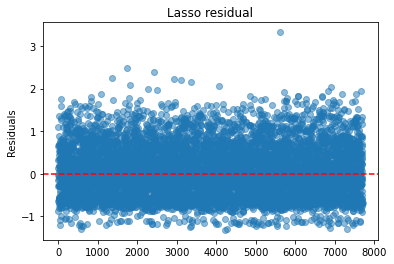

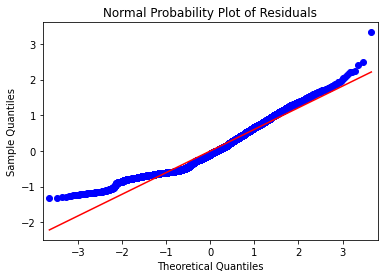

In [227]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Split data into features (X) and response variables (y)
X = df.drop('index', axis=1)

y = df['index']

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Lasso Regression 
alpha = 0.001# Set the penalty item coefficiente
lasso = Lasso(alpha=alpha)

# fit
lasso.fit(X_train_scaled, y_train)


# pred
y_pred = lasso.predict(X_test_scaled)

# compute mse
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get the feature importance
coef = pd.Series(lasso.coef_, index=X.columns)
print('Lasso coefficients:')
print(np.abs(coef).sort_values(ascending=False).head(10))

# Find the features that have the greatest influence on y
max_coef = np.abs(coef).idxmax()
print(f'The most important feature: {max_coef}')


# draw the residual plot
residuals = y_test - y_pred
plt.scatter(np.arange(len(y_test)),residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel('Residuals')
plt.title('Lasso residual')
plt.show()


import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('Normal Probability Plot of Residuals')
plt.show()

In [225]:

nonzero_index =coef.to_numpy().nonzero()
len(nonzero_index[0])

43

In [199]:
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(residuals, 0)

print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: -0.2510476187522041, p-value: 0.8017839886290771


We cannot reject the hypothesis, so the mean of residuals is 0

Evaluate model's efficiency through cross-validation

In [200]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation, where no standardization makes no difference
n_folds = 5
lasso_cv = Lasso(alpha=alpha, max_iter=10000)
scores = cross_val_score(lasso_cv, X, y, cv=n_folds, scoring='neg_mean_squared_error')

# MSE
mean_mse = np.mean(-scores)
print(f'Average Mean Squared Error: {mean_mse}')

Average Mean Squared Error: 0.38047415486113056


# try some other models, the results do not improve

In [226]:
#we have tried GridSearchCV for each one
#try Ridge regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.0001)  


ridge_model.fit(X_train_scaled, y_train)


y_pred = ridge_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.36692290886304874


In [224]:
#try ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01,l1_ratio=0.01)
elastic_net.fit(X_train_scaled, y_train)


y_pred = elastic_net.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3674331957609275
